In [1]:
# Pandas
import pandas as pd
import sys

#read in postgres user info
unpw = "C:\\Users\\Kelly\\Desktop\\KEYS"
sys.path.append(unpw)
from PostgresInfo import un_pw

#create engine
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{un_pw}@localhost:5432/EmployeeSQL')
conn = engine.connect()

In [16]:
#read in relevant databases
employees = pd.read_sql("SELECT * FROM EMPLOYEES", conn)
salaries = pd.read_sql("SELECT * FROM SALARIES", conn)
titles = pd.read_sql("SELECT * FROM TITLES", conn)

In [15]:
#create master dataframe of necessary info
employee_info = employees.merge(salaries, how='left', on='emp_no')
employee_info = employee_info.merge(titles.rename(columns={'title_id':'emp_title'}), how='left', on='emp_title')
employee_info = employee_info.drop(['emp_title', 'birthdate', 'first_name', 'last_name', 'sex', 'hire_date'], axis = 1)
employee_info

,emp_no,salary,title
0,473302,40000,Staff
1,475053,53422,Engineer
2,57444,48973,Engineer
3,421786,40000,Staff
4,282238,40000,Senior Engineer
...,...,...,...
300019,464231,69696,Staff
300020,255832,75355,Engineer
300021,76671,61886,Staff
300022,264920,62772,Staff


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6DCC1D860>]],
      dtype=object)

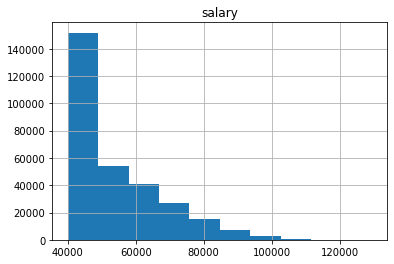

In [19]:
#create histogram to visualize the most common salary ranges for employees
hist = employee_info.hist(column = 'salary', bins=10)
hist

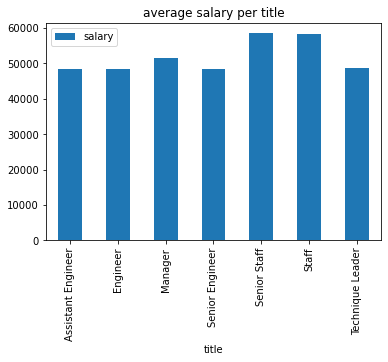

In [30]:
avg_salary = employee_info.drop(['emp_no'], axis=1).groupby(by=['title']).mean()
avg_salary.plot.bar(y='salary', rot=90, title="average salary per title")

In [33]:
my_id = employees['emp_no']==499942
new_job = employees[my_id]
new_job

,emp_no,emp_title,birthdate,first_name,last_name,sex,hire_date
168736,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997
